In [12]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
#data processing
# data arrangement

data = pd.read_csv("student-mat.csv", sep=";")

data = data[["G1", "G2", "G3", "studytime","health", "famrel", "goout","Walc","freetime", "Dalc","failures", "absences"]]

print(data.head())

predict = "G3"

X = np.array(data.drop([predict], 1))
y = np.array(data[predict])


   G1  G2  G3  studytime  health  famrel  goout  Walc  freetime  Dalc  \
0   5   6   6          2       3       4      4     1         3     1   
1   5   5   6          2       3       5      3     1         3     1   
2   7   8  10          2       3       4      2     3         3     2   
3  15  14  15          3       5       3      2     1         2     1   
4   6  10  10          2       5       4      2     2         3     1   

   failures  absences  
0         0         6  
1         0         4  
2         3        10  
3         0         2  
4         0         4  


In [24]:
# model buiding, training and testing

best_acc=0
for i in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    if acc> best_acc:
        best_acc= acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
        
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predicted= linear.predict(x_test)
for x in range(len(predictions)):
    print((predictions[x]), x_test[x],(y_test[x]))

Accuracy: 0.6855483923062077
Accuracy: 0.8986382571708371
Accuracy: 0.8297724865299968
Accuracy: 0.8876103980592035
Accuracy: 0.8579662263009014
Accuracy: 0.7559162871199563
Accuracy: 0.8301611941807419
Accuracy: 0.8680666223372817
Accuracy: 0.9088404448298453
Accuracy: 0.8778392189924988
Accuracy: 0.7392660791352326
Accuracy: 0.5872390474136162
Accuracy: 0.7995710498486752
Accuracy: 0.8195268977355727
Accuracy: 0.841892464248795
Accuracy: 0.7642355447811102
Accuracy: 0.919636364979388
Accuracy: 0.8948013695837764
Accuracy: 0.8574797002954289
Accuracy: 0.8763779943661488
-------------------------
Coefficient: 
 [ 0.14927539  0.99185649 -0.19809331  0.0633174   0.291755   -0.00426179
  0.12718376  0.06509226 -0.13192704 -0.22003886  0.03885366]
Intercept: 
 -3.257224064146797
-------------------------
4.240909033776138 [6 0 1 3 5 5 1 4 1 0 0] 0
15.609015599276898 [16 17  3  4  4  3  1  4  1  0  0] 17
10.531041038576342 [7 5 3 5 5 2 2 4 1 1 0] 0
10.066312751669615 [10  9  3  5  4  2  1  

No handles with labels found to put in legend.


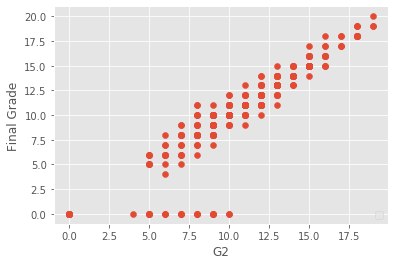

In [27]:
#Drawing and plotting model 
style.use("ggplot")
plot = "G2"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()